# Telecom Churn Case Study

## Table of Contents
1. [Business Use Case](#business-use-case)
2. [Data Import](#data-import--data-understanding)
3. [Data Understanding](#data-understanding)
4. [EDA & Data Cleaning](#eda--data-cleaning)
5. [Data Visualization](#data-visualization)\
    5.1. [Univariate Analysis](#univariate-analysis)\
    5.2. [Observations](#observations)
6. [Train-Test Split & Feature Scaling](#train-test-split--feature-scaling)
7. [Dimensionality Reduction By PCA](#dimensionality-reduction-by-pca---principal-component-analysis)
8. [Model Building](#model-building)\
    8.1. [Using Logistic Regression](#using-logistic-regression)\
    8.2. [Using Decision Trees](#using-decision-trees)\
    8.3. [Using Random Forests](#using-random-forests)
9. [Churn Prediction For Test Dataset](#churn-prediction-of-test-dataset)\
    9.1. [Using Logistic Regression Model](#using-logistic-regression-model)\
    9.2. [Using Decision Trees Model](#using-decision-tree-classifier-model)\
    9.3. [Using Random Forests Model](#using-random-forests-model)
10. [Identifying Important Variables](#identifying-important-variables)\
    10.1. [Using RFE](#using-rfe)\
    10.2. [Using Feature Importance](#using-feature-importance)\
    10.3. [Important Variables Observations](#important-variables-observations)

## Business Use Case

The main goal of the case study is to 
1) Build ML models to predict churn. 
2) Used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). 
3) By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
4) Used to identify important variables that are strong predictors of churn. 
5) These variables may also indicate why customers choose to switch to other networks.

## Data Import

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [636]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [637]:
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (69999, 172)
Test dataset shape: (30000, 171)


## Data Understanding
- There are 69999 rows with 172 columns in Training Dataset. 
- Model needs to be built in Training dataset.
- Model needs to be applied in Test Dataset. 
- Test Dataset does not contain whether the customer will churn or not. 
- Churn or not has to be identified based on the model

## EDA & Data Cleaning

Getting the Date Columns

In [638]:
date_columns=[x for x in train.columns.to_list() if 'date' in x]
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [639]:
train=train.drop(columns=date_columns)

Getting the Missing Data Columns

In [640]:
train_missing_columns=(round(100*(train.isnull().sum()/len(train.index)),2).to_frame('null')).sort_values('null', ascending=False)
train_missing_columns[train_missing_columns['null']>40]

,null
fb_user_6,74.90
arpu_2g_6,74.90
max_rech_data_6,74.90
total_rech_data_6,74.90
night_pck_user_6,74.90
arpu_3g_6,74.90
av_rech_amt_data_6,74.90
count_rech_2g_6,74.90
count_rech_3g_6,74.90
count_rech_3g_7,74.48


Removing all the columns where the missing data is more than 40%

In [641]:
null_40_per_columns=list(train_missing_columns.index[train_missing_columns['null']>40])
len(null_40_per_columns)

27

Dropping the columns with more than 40% missing columns

In [642]:
train=train.drop(columns=null_40_per_columns)
train.shape

(69999, 136)

In [643]:
train.nunique()

id                    69999
circle_id                 1
loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                61615
arpu_7                61425
arpu_8                60194
onnet_mou_6           20057
onnet_mou_7           20076
onnet_mou_8           19725
offnet_mou_6          26254
offnet_mou_7          26139
offnet_mou_8          25995
roam_ic_mou_6          5306
roam_ic_mou_7          4240
roam_ic_mou_8          4252
roam_og_mou_6          6568
roam_og_mou_7          5305
roam_og_mou_8          5215
loc_og_t2t_mou_6      11491
loc_og_t2t_mou_7      11359
loc_og_t2t_mou_8      11296
loc_og_t2m_mou_6      17848
loc_og_t2m_mou_7      17641
loc_og_t2m_mou_8      17616
loc_og_t2f_mou_6       3376
loc_og_t2f_mou_7       3365
loc_og_t2f_mou_8       3311
loc_og_t2c_mou_6       1945
loc_og_t2c_mou_7       2103
loc_og_t2c_mou_8       2204
loc_og_mou_6          22309
loc_og_mou_7          22012
loc_og_mou_8          21950
std_og_t2t_mou_6    

Unique & Single Valued columns and Removing them as well

In [644]:
uniq_cols=['id','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

In [645]:
train=train.drop(columns=uniq_cols)
train.shape

(69999, 125)

In [646]:
round(100*(train.isnull().sum()/len(train.index)),2)

arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
onnet_mou_6           3.95
onnet_mou_7           3.84
onnet_mou_8           5.29
offnet_mou_6          3.95
offnet_mou_7          3.84
offnet_mou_8          5.29
roam_ic_mou_6         3.95
roam_ic_mou_7         3.84
roam_ic_mou_8         5.29
roam_og_mou_6         3.95
roam_og_mou_7         3.84
roam_og_mou_8         5.29
loc_og_t2t_mou_6      3.95
loc_og_t2t_mou_7      3.84
loc_og_t2t_mou_8      5.29
loc_og_t2m_mou_6      3.95
loc_og_t2m_mou_7      3.84
loc_og_t2m_mou_8      5.29
loc_og_t2f_mou_6      3.95
loc_og_t2f_mou_7      3.84
loc_og_t2f_mou_8      5.29
loc_og_t2c_mou_6      3.95
loc_og_t2c_mou_7      3.84
loc_og_t2c_mou_8      5.29
loc_og_mou_6          3.95
loc_og_mou_7          3.84
loc_og_mou_8          5.29
std_og_t2t_mou_6      3.95
std_og_t2t_mou_7      3.84
std_og_t2t_mou_8      5.29
std_og_t2m_mou_6      3.95
std_og_t2m_mou_7      3.84
std_og_t2m_mou_8      5.29
std_og_t2f_mou_6      3.95
s

Since the missing % is around 5, 3, removing those columns

In [647]:
for col in train.columns:
    train=train[~train[col].isna()]

In [648]:
round(100*(train.isna().sum()/len(train.index)),2).sort_values(ascending=False)

arpu_6                0.0
total_ic_mou_7        0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
ic_others_8           0.0
ic_others_7           0.0
ic_others_6           0.0
isd_ic_mou_8          0.0
isd_ic_mou_7          0.0
isd_ic_mou_6          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
spl_ic_mou_6          0.0
total_ic_mou_8        0.0
total_ic_mou_6        0.0
loc_ic_mou_6          0.0
std_ic_mou_8          0.0
std_ic_mou_7          0.0
std_ic_mou_6          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_7      0.0
std_ic_t2m_mou_6      0.0
std_ic_t2t_mou_8      0.0
std_ic_t2t_mou_7      0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_8          0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
jun_vbc_3g            0.0
jul_vbc_3g            0.0
aug_vbc_3g            0.0
aon                   0.0
sachet_3g_8 

Now there are no missing value columns and final no of features reduces to 125. So the Final Shape of the trained datast is 63842 X 125 columns

In [649]:
train.shape

(63842, 125)

In [650]:
(1-round(len(train.index)/69999,2))*100

8.999999999999996

We can see that we have lost almost 9% records. But we have enough number of records to do our analysis.

Identifying the High Value Customers

For this business Usecase assuming that Average Recharge Amount spent for month - 6,7,8 are considered as High Value Customers

In [651]:
train['Monthly_Avg_Rech_Amt_6_7_8'] = train[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean(axis=1)
train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,Monthly_Avg_Rech_Amt_6_7_8
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0,50.666667
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0,65.000000
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0,63.333333
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,

In [652]:
train['Monthly_Avg_Rech_Amt_6_7_8'].describe([0.25,0.5,0.6,0.7])

count    63842.000000
mean       338.802972
std        376.945740
min          0.000000
25%        130.000000
50%        244.000000
60%        304.000000
70%        381.333333
max      40281.666667
Name: Monthly_Avg_Rech_Amt_6_7_8, dtype: float64

In [653]:
train = train[(train['Monthly_Avg_Rech_Amt_6_7_8'] > train['Monthly_Avg_Rech_Amt_6_7_8'].quantile(0.6))]
train.drop(['Monthly_Avg_Rech_Amt_6_7_8'], axis=1, inplace=True)
print(train.shape)

(25534, 125)


In [654]:
train.describe([0.25,0.5,0.6,0.7,0.9])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,25534.000000,25534.000000,25534.000000,25534.00000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000,25534.000000
mean,510.264015,528.595191,523.430676,254.68569,272.434662,260.771503,364.354645,382.150920,367.975542,15.198261,12.163468,12.182530,25.777025,18.879197,19.207142,84.638281,87.041520,84.130011,162.857661,165.367828,162.405740,6.338378,6.559224,6.263345,1.486520,1.802667,1.868267,253.842974,258.977516,252.807897,159.778448,177.834528,169.131274,171.631147,190.737289,179.320606,1.823238,1.791858,1.713525,333.236905,370.367868,350.169386,1.802168,1.840221,1.857714,5.503344,7.088632,7.262307,0.632955,0.027750,0.061916,595.027690,638.310588,612.167820,64.177576,67.04703

As we can see there are Outliers in the data so we need to remove them. Removing Outliers less than 1 and greater than 99 percentile

In [655]:
dataset_cols=train.columns
for col in dataset_cols:
    Q1 = train[col].quantile(0.01)
    Q3 = train[col].quantile(0.99)
    IQR = Q3 - Q1
    train = train[(train[col] >= Q1 - 1.5*IQR) & (train[col] <= Q3 + 1.5*IQR)]

In [656]:
print("Final Training Set:", train.shape)

Final Training Set: (22770, 125)


## Data Visualization

#### Univariate Analysis

In [657]:
churn=round(100*(sum(train['churn_probability'])/len(train['churn_probability'].index)),2)
churn

4.98

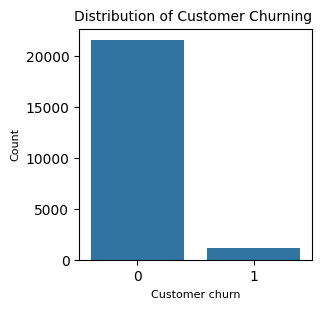

In [658]:
plt.figure(figsize=(3,3))
sns.countplot(x=train['churn_probability'])
plt.xlabel('Customer churn', fontsize= 8)
plt.ylabel('Count', fontsize= 8)
plt.title("Distribution of Customer Churning ",fontsize= 10)
plt.show()

In [659]:
agg_df = train.groupby('churn_probability').agg({'arpu_6': 'sum', 'arpu_7': 'sum', 'arpu_8': 'sum', 'total_rech_amt_6': 'sum', 'total_rech_amt_7': 'sum', 'total_rech_amt_8': 'sum'}).reset_index()
agg_df

,churn_probability,arpu_6,arpu_7,arpu_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
0,0,1.035967e+07,1.066412e+07,1.078702e+07,12201202,12515581,12681453
1,1,6.320018e+05,6.239378e+05,3.718135e+05,759780,723514,406539


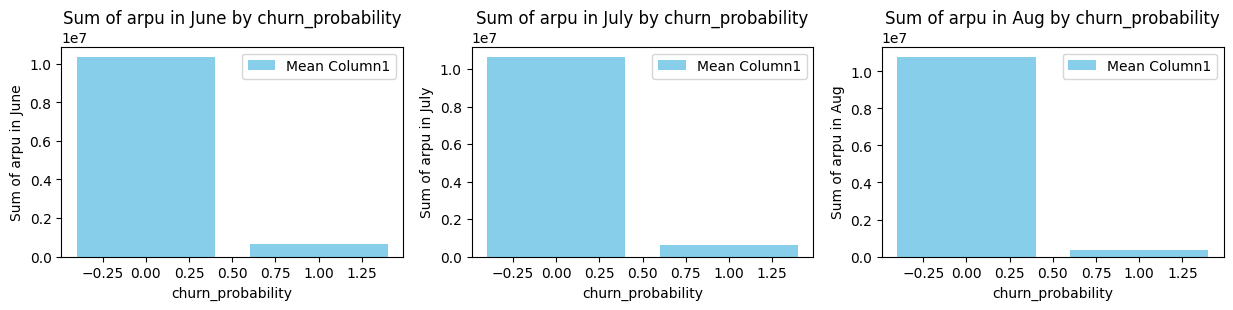

In [660]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.bar(agg_df['churn_probability'], agg_df['arpu_6'], color='skyblue', label='Mean Column1')
plt.xlabel('churn_probability')
plt.ylabel('Sum of arpu in June')
plt.title('Sum of arpu in June by churn_probability')
plt.legend()
plt.subplot(2, 3, 2)
plt.bar(agg_df['churn_probability'], agg_df['arpu_7'], color='skyblue', label='Mean Column1')
plt.xlabel('churn_probability')
plt.ylabel('Sum of arpu in July')
plt.title('Sum of arpu in July by churn_probability')
plt.legend()
plt.subplot(2, 3, 3)
plt.bar(agg_df['churn_probability'], agg_df['arpu_8'], color='skyblue', label='Mean Column1')
plt.xlabel('churn_probability')
plt.ylabel('Sum of arpu in Aug')
plt.title('Sum of arpu in Aug by churn_probability')
plt.legend()

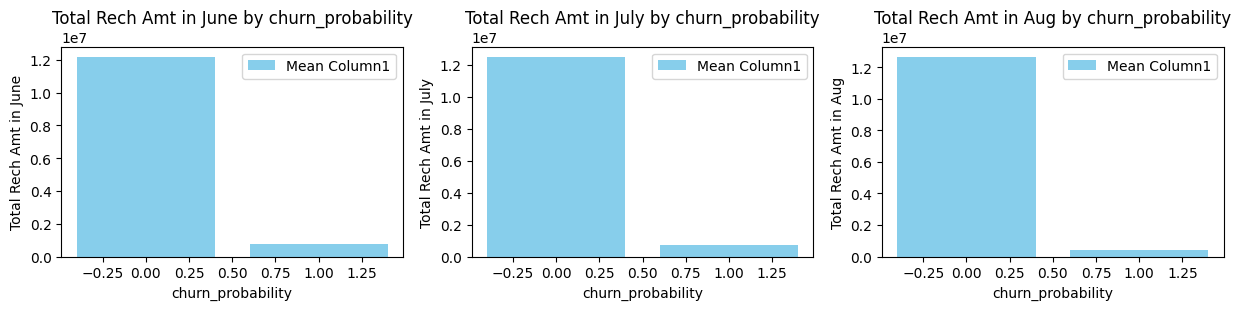

In [661]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 3, 1)
plt.bar(agg_df['churn_probability'], agg_df['total_rech_amt_6'], color='skyblue', label='Mean Column1')
plt.xlabel('churn_probability')
plt.ylabel('Total Rech Amt in June')
plt.title('Total Rech Amt in June by churn_probability')
plt.legend()
plt.subplot(2, 3, 2)
plt.bar(agg_df['churn_probability'], agg_df['total_rech_amt_7'], color='skyblue', label='Mean Column1')
plt.xlabel('churn_probability')
plt.ylabel('Total Rech Amt in July')
plt.title('Total Rech Amt in July by churn_probability')
plt.legend()
plt.subplot(2, 3, 3)
plt.bar(agg_df['churn_probability'], agg_df['total_rech_amt_8'], color='skyblue', label='Mean Column1')
plt.xlabel('churn_probability')
plt.ylabel('Total Rech Amt in Aug')
plt.title('Total Rech Amt in Aug by churn_probability')
plt.legend()

#### Observations

- As we can see both the arpu & Total Recharge Amount are almost the same for all the 3 months

## Train-Test Split & Feature Scaling

In [662]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [663]:
X=train.drop(['churn_probability'],axis=1)
y=train['churn_probability']
X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,train_size=0.7,random_state=100)

In [664]:
print("X_Train Dataset shape:", X_Train.shape)
print("X_Test Dataset shape:", X_Test.shape)
print("y_Train Dataset shape:", y_Train.shape)
print("y_Test Dataset shape:", y_Test.shape)
print("Unseen Dataset shape:", test.shape)

X_Train Dataset shape: (15938, 124)
X_Test Dataset shape: (6832, 124)
y_Train Dataset shape: (15938,)
y_Test Dataset shape: (6832,)
Unseen Dataset shape: (30000, 171)


In [665]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_Train)
X_test_scaled = scaler.transform(X_Test)

## Dimensionality Reduction By PCA - Principal Component Analysis

In [666]:
from sklearn.decomposition import PCA

In [667]:
pca=PCA(random_state=42)
pca.fit(X_train_scaled)

PCA(random_state=42)

In [668]:
len(pca.components_)

124

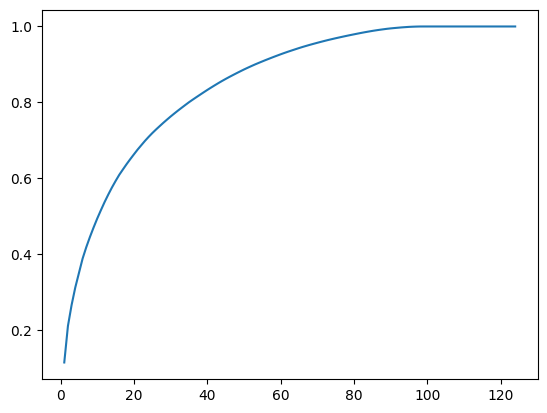

In [669]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1),var_cumu)

As we can see in Scree Plot, around 54 variables explain 90 percent of variance. Hence taking only those 50 variables/features for prediction

In [670]:
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratios.cumsum()
threshold = 0.9
n_components = (cumulative_variance_ratio < threshold).sum() + 1
pca_final = PCA(n_components=n_components)
pca_final.fit(X_Train)

PCA(n_components=54)

Getting Number of Components as 50 from PCA

In [671]:
from sklearn.decomposition import IncrementalPCA

In [672]:
incremental_pca_final = IncrementalPCA(n_components=50)

In [673]:
X_Train_pca = incremental_pca_final.fit_transform(X_train_scaled)
print("Training Set Shape after PCA:", X_Train_pca.shape)

X_Test_pca = incremental_pca_final.transform(X_test_scaled)
print("Testing Set Shape after PCA:", X_Test_pca.shape)

Training Set Shape after PCA: (15938, 50)
Testing Set Shape after PCA: (6832, 50)


In [674]:
corrmat = np.corrcoef(X_Train_pca.transpose())
corrmat.shape

(50, 50)

Mostly as we can see in the below diagram - No Correlation between the Features selected by PCA

<Axes: >

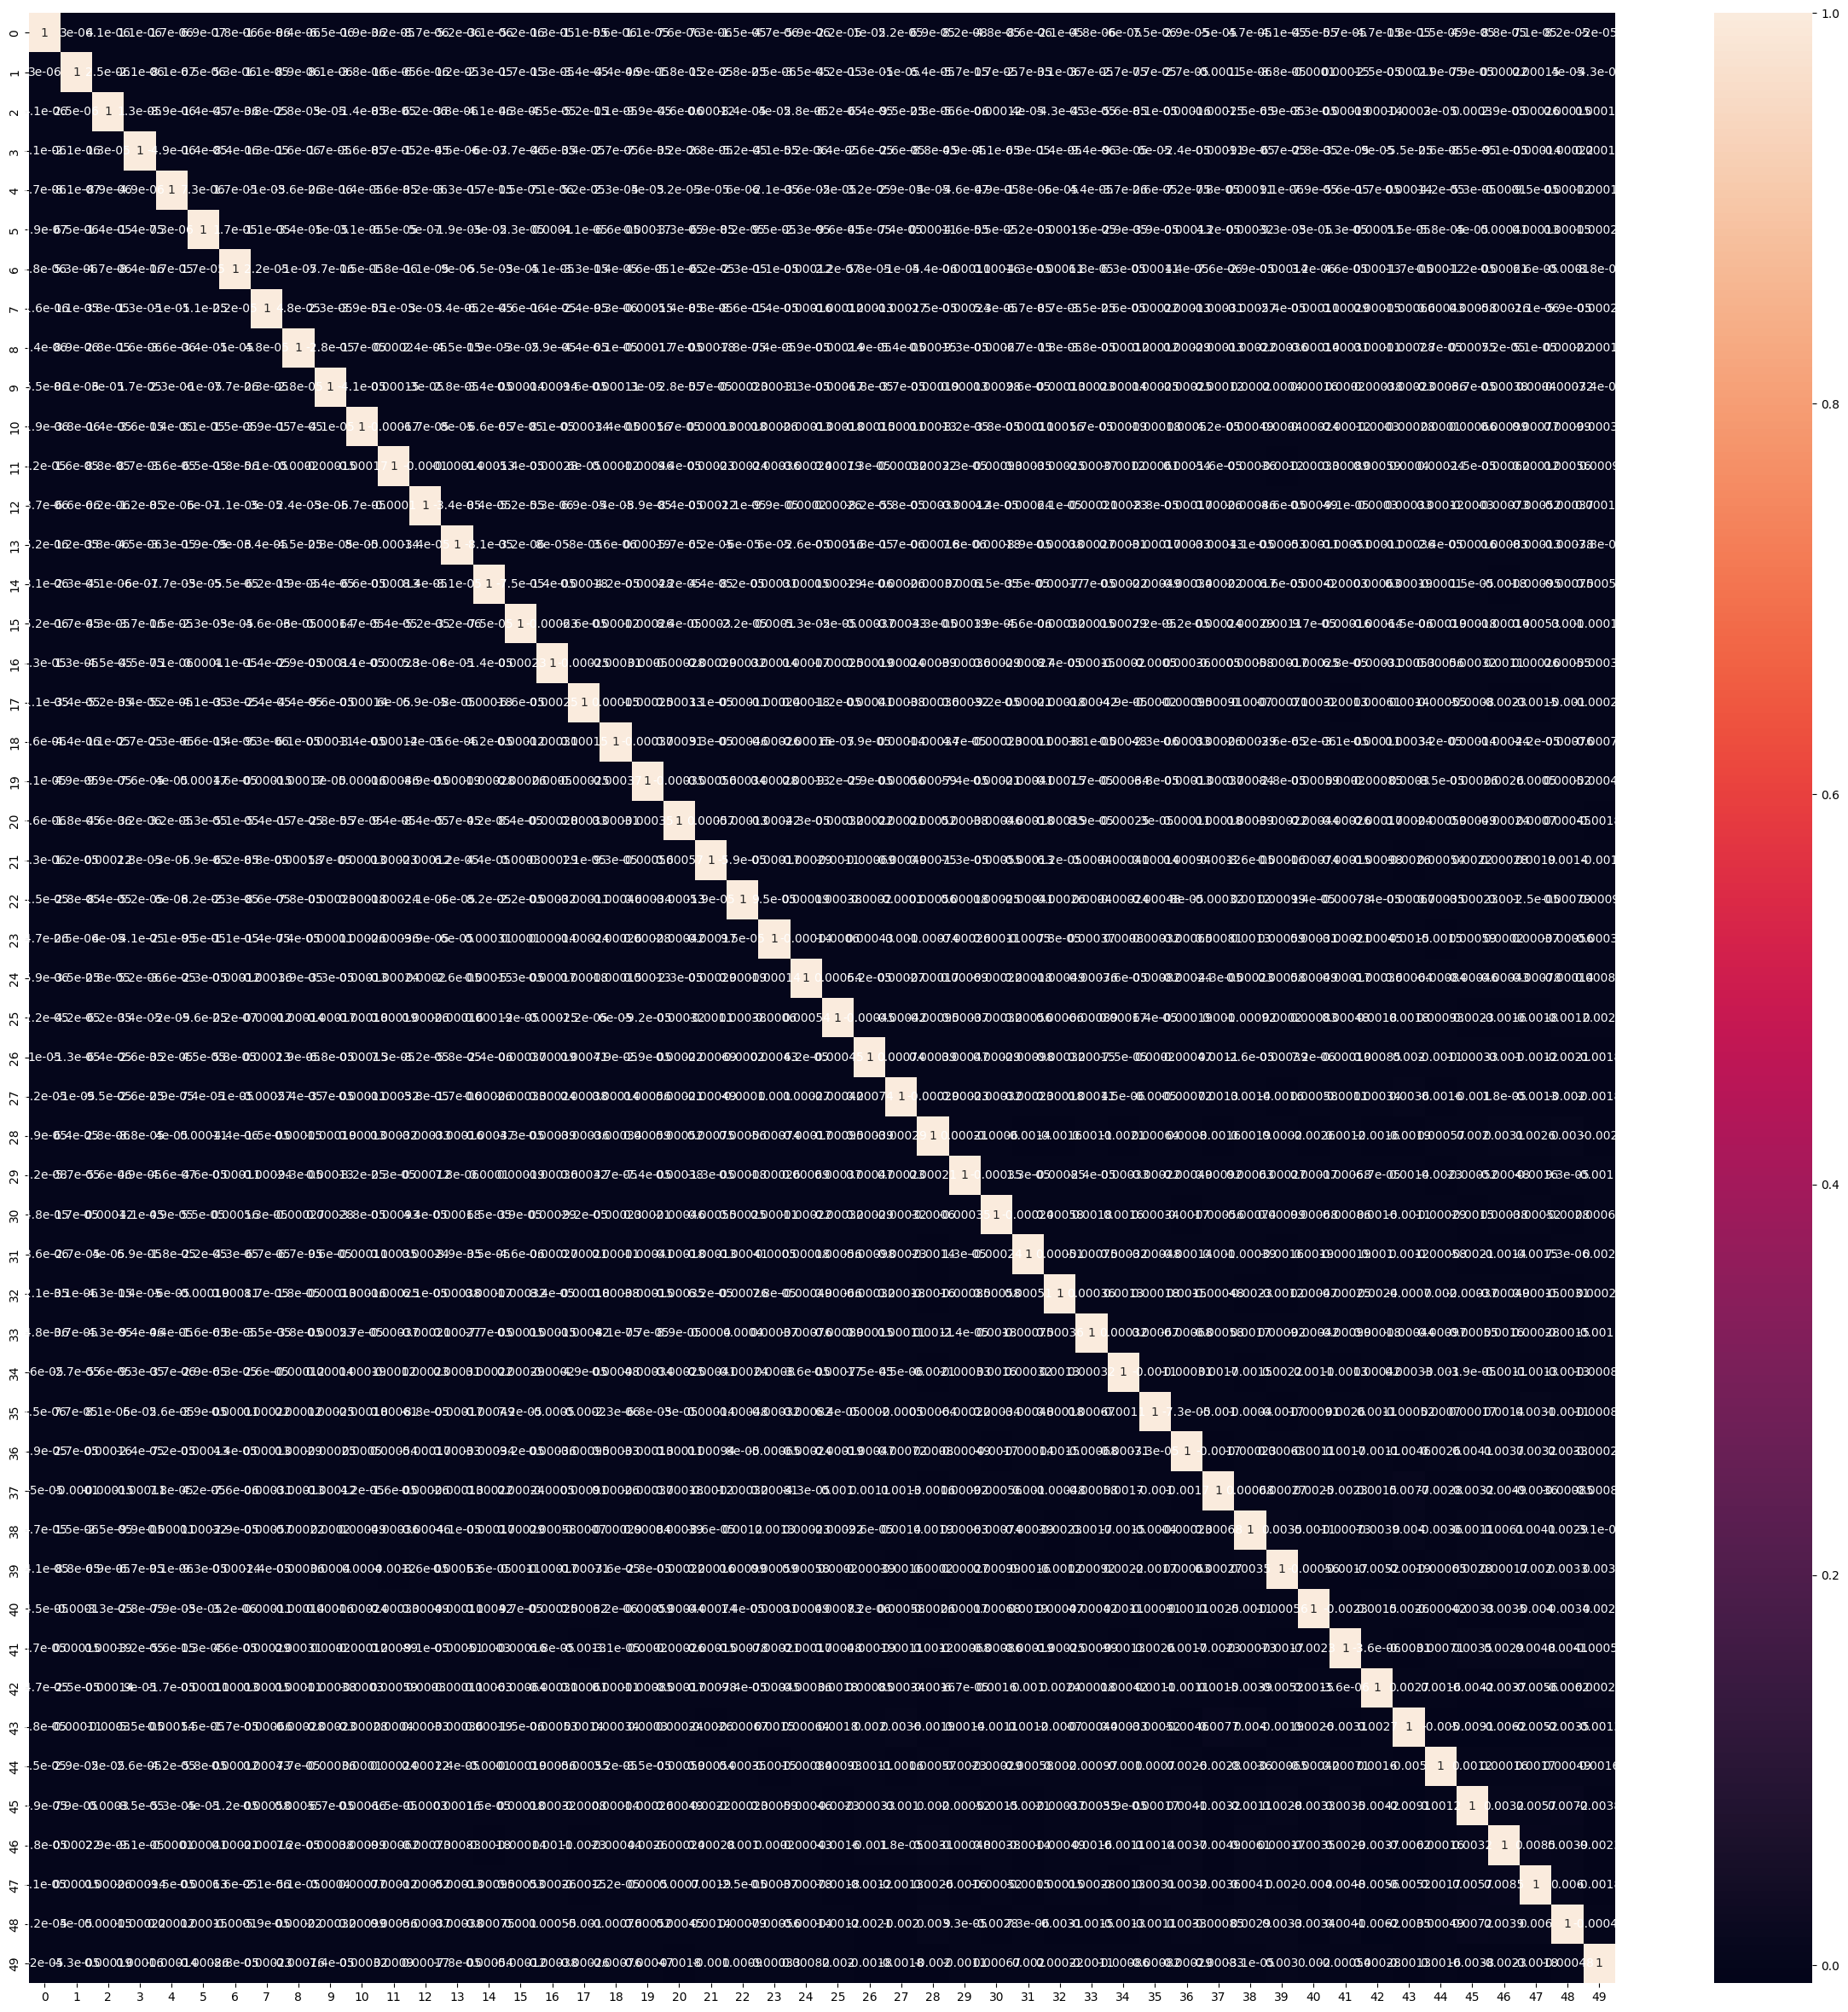

In [675]:
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

In [676]:
X_Train_pca=pd.DataFrame(X_Train_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"
                                                , "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20"
                                                , "PC21", "PC22", "PC23", "PC24", "PC25", "PC26", "PC27", "PC28", "PC29", "PC30"
                                                , "PC31", "PC32", "PC33", "PC34", "PC35", "PC36", "PC37", "PC38", "PC39", "PC40"
                                                , "PC41", "PC42", "PC43", "PC44", "PC45", "PC46", "PC47", "PC48", "PC49", "PC50"])
X_Test_pca=pd.DataFrame(X_Test_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"
                                                , "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20"
                                                , "PC21", "PC22", "PC23", "PC24", "PC25", "PC26", "PC27", "PC28", "PC29", "PC30"
                                                , "PC31", "PC32", "PC33", "PC34", "PC35", "PC36", "PC37", "PC38", "PC39", "PC40"
                                                , "PC41", "PC42", "PC43", "PC44", "PC45", "PC46", "PC47", "PC48", "PC49", "PC50"])

## Model Building

#### Using Logistic Regression

In [677]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
logreg=LogisticRegression(max_iter=400)
logreg.fit(X_Train_pca, y_Train)

LogisticRegression(max_iter=400)

In [678]:
y_pred_pca = logreg.predict_proba(X_Test_pca)

In [679]:
y_pred_pca=pd.DataFrame(y_pred_pca[:,1])

In [680]:
y_pred_pca.head()

,0
0,0.017374
1,0.040747
2,0.012157
3,0.002418
4,0.001869


In [681]:
y_pred_pca= y_pred_pca.rename(columns={ 0 : 'Pred_Churn_Prob'})

In [682]:
y_Test=pd.DataFrame(y_Test)
y_Test = y_Test.rename(columns={'churn_probability':'Act_Churn_Prob'})
y_Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6832 entries, 40108 to 69414
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Act_Churn_Prob  6832 non-null   int64
dtypes: int64(1)
memory usage: 106.8 KB


In [683]:
y_pred_pca.head()

,Pred_Churn_Prob
0,0.017374
1,0.040747
2,0.012157
3,0.002418
4,0.001869


In [684]:
numbers = [float(x*0.01) for x in range(20)]
for i in numbers:
    y_pred_pca[i]= y_pred_pca.Pred_Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_pca.head()

,Pred_Churn_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19
0,0.017374,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.040747,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.012157,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.002418,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.001869,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [685]:
y_pred_pca['Pred_Churn_Prob_Rnd'] = y_pred_pca.Pred_Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_pca.head()

,Pred_Churn_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,Pred_Churn_Prob_Rnd
0,0.017374,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.040747,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.012157,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.002418,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.001869,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [686]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_pca.Pred_Churn_Prob_Rnd, y_pred_pca[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.112119  1.000000  0.000000
0.01  0.01  0.458870  1.000000  0.390537
0.02  0.02  0.625878  1.000000  0.578635
0.03  0.03  0.732728  1.000000  0.698978
0.04  0.04  0.804011  1.000000  0.779261
0.05  0.05  0.858460  1.000000  0.840587
0.06  0.06  0.902810  1.000000  0.890537
0.07  0.07  0.937793  1.000000  0.929937
0.08  0.08  0.964286  1.000000  0.959776
0.09  0.09  0.986095  1.000000  0.984339
0.10  0.10  1.000000  1.000000  1.000000
0.11  0.11  0.988876  0.900783  1.000000
0.12  0.12  0.978484  0.808094  1.000000
0.13  0.13  0.972190  0.751958  1.000000
0.14  0.14  0.966042  0.697128  1.000000
0.15  0.15  0.960041  0.643603  1.000000
0.16  0.16  0.956235  0.609661  1.000000
0.17  0.17  0.952137  0.573107  1.000000
0.18  0.18  0.948770  0.543081  1.000000
0.19  0.19  0.945404  0.513055  1.000000


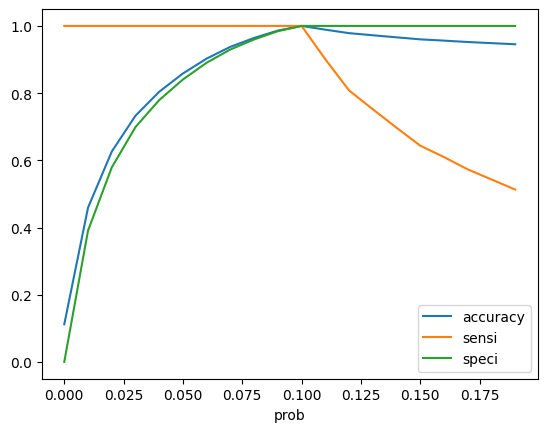

In [687]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.12 is the optimum point to take it as a cutoff probability.

In [688]:
y_pred_pca['Final_Churn_Prob_predicted'] = y_pred_pca.Pred_Churn_Prob.map( lambda x: 1 if round(x,2) > 0.12 else 0)

y_pred_pca.head()

,Pred_Churn_Prob,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,Pred_Churn_Prob_Rnd,Final_Churn_Prob_predicted
0,0.017374,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.040747,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.012157,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.002418,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.001869,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [689]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(y_Test, y_pred_pca['Final_Churn_Prob_predicted']))

# Accuracy
print("Accuracy in Logistic Regression Model:-",metrics.accuracy_score(y_Test['Act_Churn_Prob'], y_pred_pca['Final_Churn_Prob_predicted']))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      6478
           1       0.32      0.54      0.41       354

    accuracy                           0.92      6832
   macro avg       0.65      0.74      0.68      6832
weighted avg       0.94      0.92      0.93      6832

Accuracy in Logistic Regression Model:- 0.9178864168618267


#### Using Decision Trees

In [690]:
from sklearn.tree import DecisionTreeClassifier

In [691]:
dt_base = DecisionTreeClassifier(random_state=42,max_depth=10)
dt_base.fit(X_Train,y_Train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [692]:
y_train_dt_pred=dt_base.predict(X_Train)
y_test_dt_pred=dt_base.predict(X_Test)

In [693]:
print(classification_report(y_Test,y_test_dt_pred))
print("Accuracy in Decision Tree Model:-",metrics.accuracy_score(y_Test, y_test_dt_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6478
           1       0.39      0.29      0.33       354

    accuracy                           0.94      6832
   macro avg       0.68      0.63      0.65      6832
weighted avg       0.93      0.94      0.94      6832

Accuracy in Decision Tree Model:- 0.9395491803278688


#### Using Random Forests

In [694]:
from sklearn.ensemble import RandomForestClassifier

In [695]:
rf=RandomForestClassifier(n_estimators=10,max_depth=4,max_features=5,random_state=100,oob_score=True)

In [696]:
rf.fit(X_Train,y_Train)

c:\Users\sreed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [697]:
rf.oob_score_

0.9510603588907015

Hyperparameter Tuning for Random Forest

In [698]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier(random_state=100,n_jobs=-1)

In [699]:
params = {
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,50,100]
}

In [700]:
grid_search=GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv=5,
    n_jobs=-1,verbose=1,scoring="accuracy"
)

In [701]:
grid_search.fit(X_Train,y_Train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [702]:
grid_search.best_score_

0.9535698270774582

In [703]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=100)

In [704]:
y_train_rf_pred=grid_search.predict(X_Train)
y_test_rf_pred=grid_search.predict(X_Test)

In [705]:
print(classification_report(y_Test,y_test_rf_pred))
print("Accuracy in Random Forests Model:-",metrics.accuracy_score(y_Test, y_test_rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      6478
           1       0.62      0.20      0.30       354

    accuracy                           0.95      6832
   macro avg       0.79      0.60      0.64      6832
weighted avg       0.94      0.95      0.94      6832

Accuracy in Random Forests Model:- 0.9521370023419203


Accuracy in Logistic Regression :- 0.9178 \
Accuracy in Decision Trees :- 0.9395 \
Accuracy in Random Forests :- 0.9521 \
We can see that Random Forests are best when compared with all the models. Random forests definitely gave a great leverage in the results as compared to both logistic regression and decision trees with much less effort. 

## Churn Prediction of Test Dataset

#### Using Logistic Regression Model

In [706]:
X_Test_New = pd.read_csv('test.csv')
X_Test_New = X_Test_New[X_Test.columns]
X_Test_New = X_Test_New.fillna(0)
X_Test_New_pca = incremental_pca_final.transform(X_Test_New)

c:\Users\sreed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but IncrementalPCA was fitted without feature names
  warnings.warn(


In [707]:
X_Test_New_pca.shape

(30000, 50)

In [708]:
X_Test_New_pca=pd.DataFrame(X_Test_New_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"
                                                , "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20"
                                                , "PC21", "PC22", "PC23", "PC24", "PC25", "PC26", "PC27", "PC28", "PC29", "PC30"
                                                , "PC31", "PC32", "PC33", "PC34", "PC35", "PC36", "PC37", "PC38", "PC39", "PC40"
                                                , "PC41", "PC42", "PC43", "PC44", "PC45", "PC46", "PC47", "PC48", "PC49", "PC50"])
print("New Testing Set Shape after PCA:", X_Test_New_pca.shape)

New Testing Set Shape after PCA: (30000, 50)


In [709]:
y_Test_New_pred_pca = logreg.predict_proba(X_Test_New_pca)
y_Test_New_pred=pd.DataFrame({'id': test['id'], 'Churn_Probability':y_Test_New_pred_pca[:,1]})
y_Test_New_pred=y_Test_New_pred.set_index('id')
y_Test_New_pred['Churn_Probability'] = y_Test_New_pred.Churn_Probability.map( lambda x: 1 if round(x,2) > 0.12 else 0)
y_Test_New_pred.head()

,Churn_Probability
id,
69999,0
70000,0
70001,0
70002,0
70003,0


In [710]:
y_Test_New_pred['Churn_Probability'].value_counts()

Churn_Probability
0    28985
1     1015
Name: count, dtype: int64

#### Using Decision Tree Classifier Model

In [711]:
X_Test_New = pd.read_csv('test.csv')
X_Test_New = X_Test_New[X_Test.columns]
y_Test_New_dt_pred = dt_base.predict(X_Test_New)
y_Test_New_dt_pred=pd.DataFrame({'id': test['id'], 'Churn_Probability':y_Test_New_dt_pred})
y_Test_New_dt_pred=y_Test_New_dt_pred.set_index('id')
y_Test_New_dt_pred.head()

,Churn_Probability
id,
69999,0
70000,0
70001,1
70002,0
70003,0


In [712]:
y_Test_New_dt_pred['Churn_Probability'].value_counts()

Churn_Probability
0    26740
1     3260
Name: count, dtype: int64

#### Using Random Forests Model

In [713]:
X_Test_New = pd.read_csv('test.csv')
X_Test_New = X_Test_New[X_Test.columns]
y_Test_New_rf_pred = grid_search.predict(X_Test_New)
y_Test_New_rf_pred=pd.DataFrame({'id': test['id'], 'Churn_Probability':y_Test_New_rf_pred})
y_Test_New_rf_pred=y_Test_New_rf_pred.set_index('id')
y_Test_New_rf_pred.head()

,Churn_Probability
id,
69999,0
70000,0
70001,1
70002,0
70003,0


In [714]:
y_Test_New_rf_pred['Churn_Probability'].value_counts()

Churn_Probability
0    29268
1      732
Name: count, dtype: int64

In [715]:
y_Test_New_rf_pred.to_csv('TelecomChurn_Submissions.csv')

## Identifying Important Variables

#### Using RFE

In [716]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 20 columns
rfe = RFE(logreg, n_features_to_select=20)

# Fit the rfe model with train set
rfe = rfe.fit(X_Train, y_Train)

# RFE selected columns
rfe_cols = X_Train.columns[rfe.support_]
print(rfe_cols)

c:\Users\sreed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sreed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Index(['loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8',
       'total_rech_num_7', 'total_rech_num_8', 'monthly_2g_6', 'monthly_2g_8',
       'sachet_2g_8', 'sachet_3g_8'],
      dtype='object')


c:\Users\sreed\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [717]:
list(zip(X_Train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 75),
 ('arpu_7', False, 64),
 ('arpu_8', False, 48),
 ('onnet_mou_6', False, 4),
 ('onnet_mou_7', False, 57),
 ('onnet_mou_8', False, 25),
 ('offnet_mou_6', False, 5),
 ('offnet_mou_7', False, 53),
 ('offnet_mou_8', False, 86),
 ('roam_ic_mou_6', False, 37),
 ('roam_ic_mou_7', False, 36),
 ('roam_ic_mou_8', False, 95),
 ('roam_og_mou_6', False, 7),
 ('roam_og_mou_7', False, 55),
 ('roam_og_mou_8', False, 15),
 ('loc_og_t2t_mou_6', False, 39),
 ('loc_og_t2t_mou_7', False, 54),
 ('loc_og_t2t_mou_8', False, 24),
 ('loc_og_t2m_mou_6', False, 98),
 ('loc_og_t2m_mou_7', False, 60),
 ('loc_og_t2m_mou_8', False, 29),
 ('loc_og_t2f_mou_6', False, 94),
 ('loc_og_t2f_mou_7', False, 62),
 ('loc_og_t2f_mou_8', False, 22),
 ('loc_og_t2c_mou_6', False, 3),
 ('loc_og_t2c_mou_7', False, 43),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 45),
 ('loc_og_mou_7', False, 52),
 ('loc_og_mou_8', False, 44),
 ('std_og_t2t_mou_6', False, 38),
 ('std_og_t2t_mou_7', False, 56),
 ('st

Identifying the Top 20 Features for Churn

In [718]:
top_n_features=20
rfe_df = pd.DataFrame(rfe.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfe_df[rfe_df.Rank<top_n_features+1]

,Rank
spl_og_mou_8,1
og_others_6,1
monthly_2g_8,1
loc_og_t2c_mou_8,1
std_ic_t2m_mou_8,1
isd_og_mou_7,1
spl_ic_mou_8,1
monthly_2g_6,1
std_ic_mou_8,1
std_og_t2m_mou_8,1


#### Using Feature Importance

In [719]:
rf_best.feature_importances_

array([8.57934148e-03, 1.26775167e-02, 2.08269526e-02, 8.62962388e-03,
       9.95882195e-03, 7.42392561e-03, 7.29202957e-03, 7.81444179e-03,
       1.63791499e-02, 2.64126185e-03, 8.63540828e-03, 5.54514817e-02,
       4.56315506e-03, 9.47011504e-03, 5.47757760e-02, 9.25751644e-03,
       9.99612580e-03, 1.01245385e-02, 7.46691469e-03, 7.36585845e-03,
       2.09637909e-02, 4.08391474e-03, 6.94565110e-03, 4.40201215e-03,
       2.24171663e-03, 3.13872233e-03, 3.05491966e-03, 6.82804816e-03,
       7.86393100e-03, 2.59617595e-02, 8.78861774e-03, 1.34178066e-02,
       4.43866810e-03, 7.89199534e-03, 1.08606513e-02, 7.73272245e-03,
       5.43914680e-04, 8.03051439e-04, 1.41183594e-04, 8.52872901e-03,
       1.00655875e-02, 1.19616029e-02, 5.40710164e-04, 3.61744729e-04,
       4.22805403e-04, 6.47789588e-03, 8.38029795e-03, 4.96842399e-03,
       2.26016470e-03, 0.00000000e+00, 0.00000000e+00, 1.06960353e-02,
       1.23873579e-02, 3.85311262e-02, 6.08856264e-03, 1.12647208e-02,
      

In [720]:
imp_df=pd.DataFrame({
        "Varname": X_Train.columns,
        "Imp": rf_best.feature_importances_
       })
imp_df.sort_values(by="Imp",ascending=False)

,Varname,Imp
11,roam_ic_mou_8,0.055451
80,total_ic_mou_8,0.054955
14,roam_og_mou_8,0.054776
53,total_og_mou_8,0.038531
65,loc_ic_mou_8,0.037429
29,loc_og_mou_8,0.025962
95,total_rech_amt_8,0.024268
20,loc_og_t2m_mou_8,0.020964
2,arpu_8,0.020827
101,last_day_rch_amt_8,0.019513


#### Important Variables Observations

Comparing both the Important Variables 
- last_day_rch_amt_8
- loc_ic_t2t_mou_7
- max_rech_amt_8
- onnet_mou_6
- roam_og_mou_8
- std_ic_mou_8
- std_ic_t2m_mou_8
- std_og_mou_8
- total_ic_mou_7
- total_ic_mou_8
- total_og_mou_6
- total_rech_num_7
Above variables are in top 20 when identified in both the models. Hence Telecom Operator can consider the above fields and then predict a customer will churn or not.